# Otimização Multiobjetivo - Exercício 1

Derive the one-dimensional minimization problem for the following case:
\begin{equation}
    \text{min } f(\mathbf{x}) = (x_1^2 - x_2)^2 + (1-x_1)^2
\end{equation}
from the starting point $\mathbf{x_0} = (-2,-2)^T$ along the search direction $\mathbf{d} = (1.00,0.25)^T$.

In [39]:
# Importa pacotes
import numpy as np
import matplotlib.pyplot as plt

# Define funcao
def f(x, y):
    z = (x ** 2 - y) ** 2 + (1 - x) ** 2
    return z

## Curva de nível, ponto inicial e direção de busca
#### Parametrização da reta:
\begin{equation}
    \mathbf{p} = \mathbf{x_0} + \lambda\mathbf{d} = [(-2 + \lambda), (-2 + 0.25\lambda)]^T
\end{equation}
em que para este exercício será adotado $\lambda \in [0,3.4]$ 

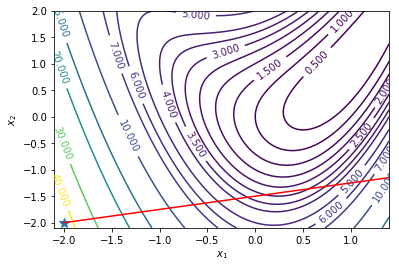

In [40]:
# Curvas de nível
delta = 0.01
r1 = np.arange(-2.1, 1.41, delta)
r2 = np.arange(-2.1, 2.01, delta)

x1, x2 = np.meshgrid(r1, r2)
plt.figure(1)
lev = [0.5, 1, 1.5, 2, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 10.0, 15.0, 20, 30, 40]
cs = plt.contour(x1, x2, f(x1, x2), levels=lev)
plt.clabel(cs, inline=1, fontsize=10)

# Ponto inicial
plt.plot(-2, -2, '*', markersize=10)

# Direcao de busca
search_dir = [1, 0.25]
max_lambda = 3.4
lbd = np.arange(0, max_lambda, delta)
lineX1 = -2 + lbd*1
lineX2 = -2 + lbd*0.25
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.plot(lineX1, lineX2, 'r')

plt.show(1)

## Valores de f(x) sobre a reta
Utilizando a função $f(x)$, podemos definir seus valores sobre a reta vermelha:

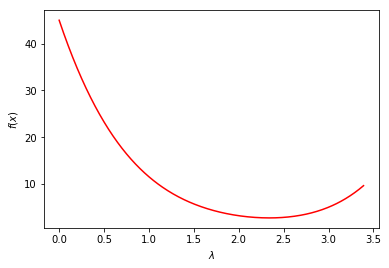

In [41]:
# Plot da reta
fx = f(lineX1, lineX2)

plt.figure(2)
plt.plot(lbd, fx, 'r')
plt.xlabel('$ \lambda $')
plt.ylabel('$f(x)$')
plt.show(2)

## Valor mínimo de f(x) sobre a reta
Podemos determinar o ponto ótimo para esta direção de busca por inspeção:

f(x*) =  2.77833636


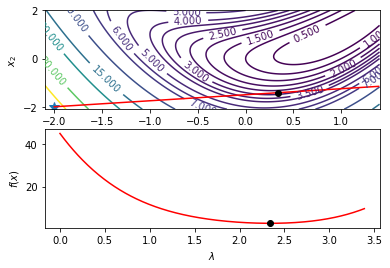

In [42]:
# Valor minimo de f(x) sobre a reta
min_fx_ind = np.argmin(fx)
print('f(x*) = ', fx[min_fx_ind]) # imprime valor otimo

plt.figure(3)
plt.subplot(211)
cs = plt.contour(x1, x2, f(x1, x2), levels=lev)
plt.plot(-2, -2, '*', markersize=10)
plt.clabel(cs, inline=1, fontsize=10)
plt.plot(lineX1, lineX2, 'r')
plt.plot(-2+lbd[min_fx_ind], -2+0.25*lbd[min_fx_ind], 'ko', markersize=6) # valor otimo
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.subplot(212)
plt.plot(lbd, fx, 'r')
plt.plot(lbd[min_fx_ind], fx[min_fx_ind], 'ko', markersize=6) # valor otimo
plt.xlabel('$ \lambda $')
plt.ylabel('$f(x)$')
plt.show(3)

## Derivação analítica

### Função univariável
Desenvolvendo $f(\mathbf{x})$:

\begin{equation}
    f(\mathbf{x}) = x_1^4 - 2x_1^2x_2 + x_1^2 + x_2^2 - 2x_1 + 1
\end{equation}

Escrevendo $f$ em função de $\lambda$:
\begin{equation}
    f(\lambda) = (-2+\lambda)^4 - 2(-2+\lambda)^2(-2+0.25\lambda) + (-2+\lambda)^2 + (-2+0.25\lambda)^2 - 2(-2+\lambda) + 1 
\end{equation}

E nosso problema unidimensional de otimização passa a ser definir o valor mínimo de $f(\lambda)$.

Podemos agora traçar o gráfico de $f(\lambda)$ para nosso intervalo ($\lambda \in [0, 3.4]$). Note que ele é idêntico ao obtido empiricamente.

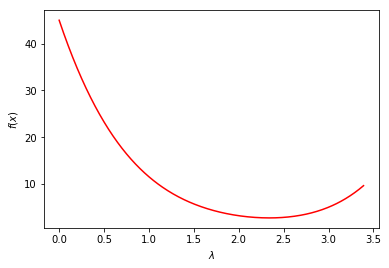

In [43]:
def g(l):
    z = (-2+l)**4 - 2*(-2+0.25*l)*(-2+l)**2 + (-2+l)**2 + (-2+0.25*l)**2 - 2*(-2+l) + 1
    return z


plt.figure(4)
plt.plot(lbd, g(lbd), 'r')
plt.xlabel('$ \lambda $')
plt.ylabel('$f(x)$')
plt.show(4)

## Ponto ótimo através da derivada

A derivada de $f(\lambda)$ é:
\begin{equation}
    f'(\lambda) = 4 (l^3 - 6.375 l^2 + 15.5313 l - 14.25)
\end{equation}

Igualando $f'(\lambda)$ a $0$ é possível determinar que $\lambda \approx 2.34$, o que soluciona nosso problema. Este fato pode ser confirmado graficamente.

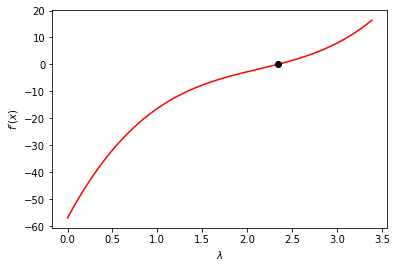

In [44]:
def f_lin(l):
    z = 4*(l**3 - 6.375*l**2 + 15.5313*l - 14.25)
    return z

plt.figure(5)
plt.plot(lbd, f_lin(lbd), 'r')
plt.xlabel('$ \lambda $')
plt.ylabel('$f\'(x)$')
plt.plot(2.34, f_lin(2.34),'ko', markersize=6)
plt.show(5)